In [5]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [20]:
from statsmodels.tsa.stattools import acovf,acf,pacf,pacf_yw,pacf_ols
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

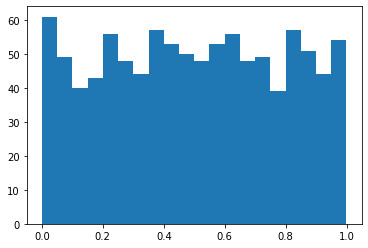

count    1000.000000
mean        0.500049
std         0.288532
min         0.000763
25%         0.250383
50%         0.499488
75%         0.744560
max         0.998932
dtype: float64

In [26]:
num_samples = 1000
num_bins = 20
whiteNoise = np.random.random(size=num_samples)
plt.hist(whiteNoise, num_bins)
plt.show()
pd.Series(whiteNoise).describe()

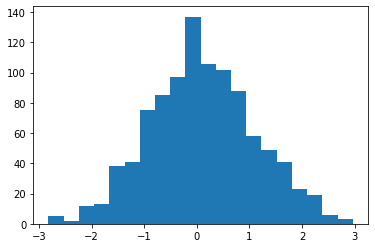

In [9]:
mu, sigma = 0, 1 # mean and standard deviation
gaussianNoise=np.random.normal(mu, sigma,size=num_samples)
plt.hist(gaussianNoise, num_bins)
plt.show()

            Temp
Date            
1981-01-01  20.7
1981-01-02  17.9
1981-01-03  18.8
1981-01-04  14.6
1981-01-05  15.8


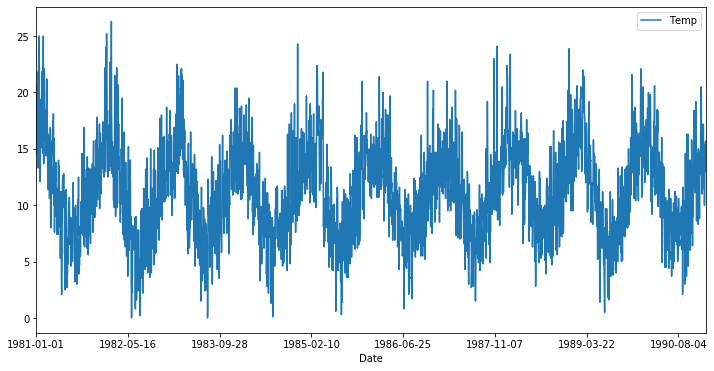

In [14]:
series = pd.read_csv('daily-min-temperatures.txt', header=0, index_col=0)
print(series.head())
series.plot(figsize=(12,6))

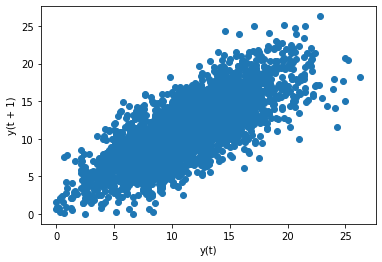

In [17]:
from pandas.plotting import lag_plot
lag_plot(series)

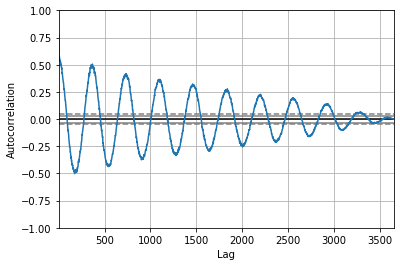

In [18]:
pd.plotting.autocorrelation_plot(series)

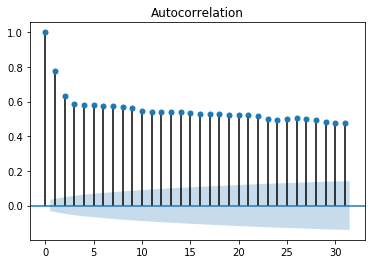

In [22]:
plot_acf(series, lags=31);

In [30]:
import pandas as pd
import numpy as np
%matplotlib inline

In [34]:
df=pd.read_csv('uspopulation.csv',index_col='DATE',parse_dates=True)
df.index.freq='MS'
df.head()
df.tail()
len(df)

96

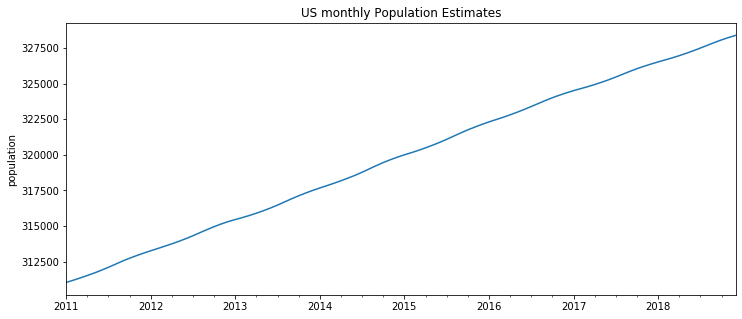

In [33]:
title='US monthly Population Estimates'
ylabel='population'
xlabel=''
ax = df['PopEst'].plot(figsize=(12,5),title=title);
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel);

In [35]:
train=df.iloc[:84]
test=df.iloc[84:]

In [42]:
from statsmodels.tsa.ar_model import AR, ARResults
model=AR(train['PopEst'])
AR1fit=model.fit(maxlag=1,method='mle')
print(f'lag:{AR1fit.k_ar}')
print(f'Coefficients:\n{AR1fit.params}')

lag:1
Coefficients:
const        176.928282
L1.PopEst      0.999444
dtype: float64


E:\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [50]:
start=len(train)
end=len(train)+len(test)-1
predictions1=AR1fit.predict(start=start,end=end,dynamic=False).rename('AR(1) Predictions')

In [51]:
predictions1

2018-01-01    326373.584220
2018-02-01    326369.170893
2018-03-01    326364.760018
2018-04-01    326360.351594
2018-05-01    326355.945620
2018-06-01    326351.542093
2018-07-01    326347.141013
2018-08-01    326342.742379
2018-09-01    326338.346189
2018-10-01    326333.952441
2018-11-01    326329.561134
2018-12-01    326325.172268
Freq: MS, Name: AR(1) Predictions, dtype: float64

In [55]:
for i in range(len(predictions1)):
    print(f"predicted={predictions1[i]:<11.10}, expected={test['PopEst'][i]}")

predicted=326373.5842, expected=326527
predicted=326369.1709, expected=326669
predicted=326364.76  , expected=326812
predicted=326360.3516, expected=326968
predicted=326355.9456, expected=327134
predicted=326351.5421, expected=327312
predicted=326347.141 , expected=327502
predicted=326342.7424, expected=327698
predicted=326338.3462, expected=327893
predicted=326333.9524, expected=328077
predicted=326329.5611, expected=328241
predicted=326325.1723, expected=328393


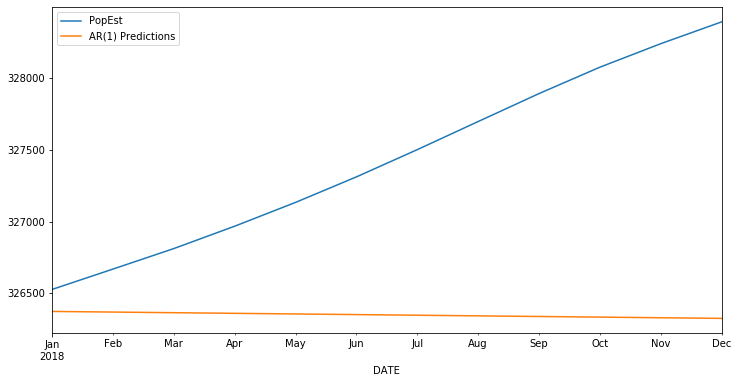

In [58]:
test['PopEst'].plot(legend=True)
predictions1.plot(legend=True,figsize=(12,6))

In [59]:
AR2fit = model.fit(maxlag=2,method='mle')
print(f'Lag: {AR2fit.k_ar}')
print(f'Coefficients:\n{AR2fit.params}')

Lag: 2
Coefficients:
const        137.304014
L1.PopEst      1.996497
L2.PopEst     -0.996928
dtype: float64


E:\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [61]:
start=len(train)
end=len(train)+len(test)-1
predictions2=AR2fit.predict(start=start,end=end,dynamic=False).rename('AR(2) Predictions')

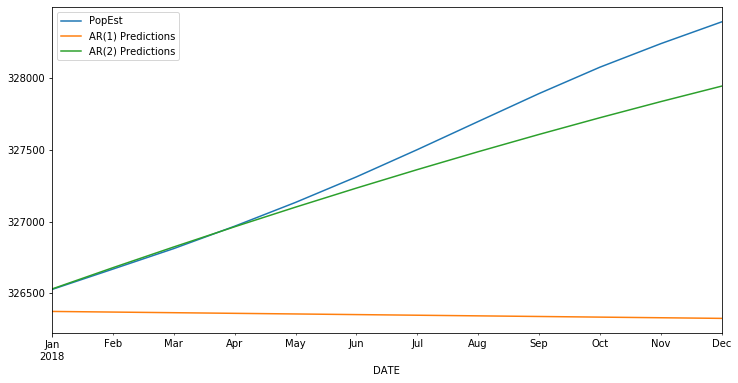

In [62]:
test['PopEst'].plot(legend=True)
predictions1.plot(legend=True)
predictions2.plot(legend=True,figsize=(12,6));

In [63]:
ARfit = model.fit(method='mle')
print(f'Lag: {ARfit.k_ar}')
print(f'Coefficients:\n{ARfit.params}')

Lag: 11
Coefficients:
const         96.110009
L1.PopEst      2.301107
L2.PopEst     -2.045341
L3.PopEst      1.412490
L4.PopEst     -1.253254
L5.PopEst      0.977057
L6.PopEst     -0.971095
L7.PopEst      0.941419
L8.PopEst     -0.371548
L9.PopEst      0.135740
L10.PopEst    -0.063249
L11.PopEst    -0.063629
dtype: float64


E:\Anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
E:\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [65]:
start = len(train)
end = len(train)+len(test)-1
rename = f'AR(11) Predictions'

predictions11 = ARfit.predict(start=start,end=end,dynamic=False).rename(rename)

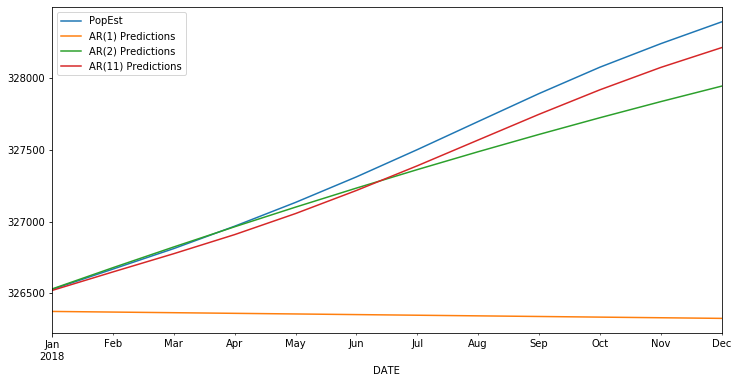

In [66]:
test['PopEst'].plot(legend=True)
predictions1.plot(legend=True)
predictions2.plot(legend=True)
predictions11.plot(legend=True,figsize=(12,6));

In [68]:
from sklearn.metrics import mean_squared_error

labels = ['AR(1)','AR(2)','AR(11)']
preds = [predictions1, predictions2, predictions11]  # these are variables, not strings!

for i in range(3):
    error = mean_squared_error(test['PopEst'], preds[i])
    print(f'{labels[i]} Error: {error:11.10}')

AR(1) Error:  1563803.16
AR(2) Error: 53396.37735
AR(11) Error: 12910.76405


E:\Anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
E:\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


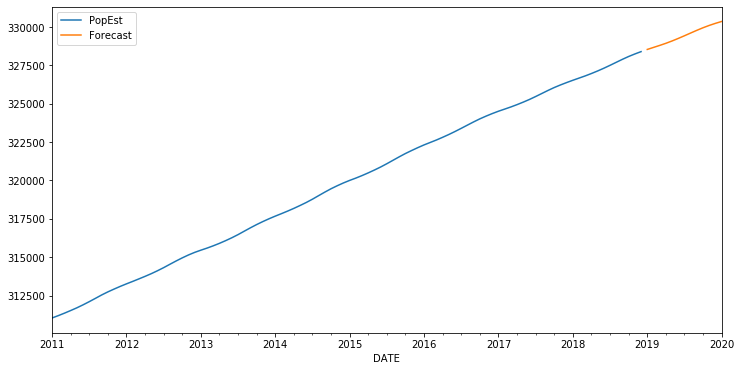

In [69]:
# First, retrain the model on the full dataset
model = AR(df['PopEst'])

# Next, fit the model
ARfit = model.fit(maxlag=11,method='mle')

# Make predictions
fcast = ARfit.predict(start=len(df), end=len(df)+12, dynamic=False).rename('Forecast')

# Plot the results
df['PopEst'].plot(legend=True)
fcast.plot(legend=True,figsize=(12,6));
